In [52]:
from d2l import torch as d2l
import numpy as np
import torch
from torch import nn

import cv2

import torchvision
from torchvision import transforms
from torchvision import datasets

from torch.utils import data
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

from PIL import Image
import PIL.ImageOps 
import os

In [78]:
img_folder_path = r'/Users/dmitryi/Documents/GitHub/data/images2'

In [94]:
class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = all_imgs#natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = cv2.imread(img_loc, cv2.IMREAD_GRAYSCALE)
        th, inverted_image = cv2.threshold(image, 60, 255, cv2.THRESH_BINARY_INV)
        image2 = cv2.resize(inverted_image, (28,28))
        tensor_image = self.transform(image2)
        return tensor_image

In [95]:
batch_size2=1
my_trans = transforms.Compose([transforms.ToTensor()])

my_dataset = CustomDataSet(img_folder_path, transform=my_trans)
train_loader = data.DataLoader(my_dataset , batch_size=batch_size2, shuffle=False, 
                               num_workers=4, drop_last=True)

In [96]:
my_dataset[0][0].shape,len(my_dataset)

(torch.Size([28, 28]), 10)

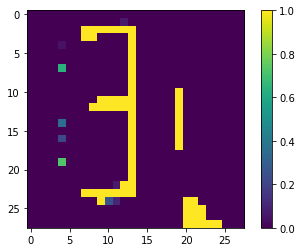

In [97]:
plt.imshow(my_dataset[9][0])
plt.colorbar()